# Merged Tree x Heat Index

In [17]:
import pandas as pd

In [18]:
tree_df = pd.read_csv('tracts_tree_class.csv')
tree_df.head()

,Fips,geometry,City,Tree Canopy Existing Percentage,Tree Canopy Class
0,6037137504,"POLYGON ((-118.581186 34.143176, -118.580994 3...",Woodland Hills,30.562925,3
1,6037138000,"POLYGON ((-118.60573 34.145854, -118.605611 34...",Woodland Hills,34.899442,3
2,6037138000,"POLYGON ((-118.60573 34.145854, -118.605611 34...",Woodland Hills,33.835898,3
3,6037138000,"POLYGON ((-118.60573 34.145854, -118.605611 34...",Woodland Hills,28.695348,3
4,6037139200,"POLYGON ((-118.530824 34.180236, -118.529515 3...",Encino,22.877822,2


In [19]:
tree_df = tree_df.rename(columns={'Fips': 'GEOID'})
tree_df.head()

,GEOID,geometry,City,Tree Canopy Existing Percentage,Tree Canopy Class
0,6037137504,"POLYGON ((-118.581186 34.143176, -118.580994 3...",Woodland Hills,30.562925,3
1,6037138000,"POLYGON ((-118.60573 34.145854, -118.605611 34...",Woodland Hills,34.899442,3
2,6037138000,"POLYGON ((-118.60573 34.145854, -118.605611 34...",Woodland Hills,33.835898,3
3,6037138000,"POLYGON ((-118.60573 34.145854, -118.605611 34...",Woodland Hills,28.695348,3
4,6037139200,"POLYGON ((-118.530824 34.180236, -118.529515 3...",Encino,22.877822,2


In [20]:
heat_df = pd.read_csv('merged_tracts.csv')
heat_df.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,HWAV_RISKS,heatrisk_class
0,6,37,599100,6037599100,1400000US06037599100,5991.00,Census Tract 5991,G5020,S,337352192,1098469235,32.925570,-118.497290,MULTIPOLYGON (((-13173947.320773387 3940389.95...,15.892118,0
1,6,37,620305,6037620305,1400000US06037620305,6203.05,Census Tract 6203.05,G5020,S,1265579,1275093,33.892367,-118.416573,POLYGON ((-13182420.365878586 4015434.46283120...,21.851068,0
2,6,37,620201,6037620201,1400000US06037620201,6202.01,Census Tract 6202.01,G5020,S,229583,183201,33.903370,-118.421856,POLYGON ((-13182717.926413272 4016079.72588719...,16.687675,0
3,6,37,620102,6037620102,1400000US06037620102,6201.02,Census Tract 6201.02,G5020,S,871913,0,33.920194,-118.418063,POLYGON ((-13183097.643692017 4018544.68730978...,20.628597,0
4,6,37,620101,6037620101,1400000US06037620101,6201.01,Census Tract 6201.01,G5020,S,1335926,3064,33.927450,-118.420861,POLYGON ((-13183392.533542898 4019531.97673561...,24.027256,1


In [24]:
columns_to_keep_heat = ['GEOID', 
                   'HWAV_RISKS', 'heatrisk_class', 'geometry'
                   ]
#add it to a new dataframe
heat_df=heat_df[columns_to_keep_heat]
heat_df.head()

,GEOID,HWAV_RISKS,heatrisk_class,geometry
0,6037599100,15.892118,0,MULTIPOLYGON (((-13173947.320773387 3940389.95...
1,6037620305,21.851068,0,POLYGON ((-13182420.365878586 4015434.46283120...
2,6037620201,16.687675,0,POLYGON ((-13182717.926413272 4016079.72588719...
3,6037620102,20.628597,0,POLYGON ((-13183097.643692017 4018544.68730978...
4,6037620101,24.027256,1,POLYGON ((-13183392.533542898 4019531.97673561...


In [25]:
columns_to_keep_tree = ['GEOID', 
                   'City', 'Tree Canopy Existing Percentage', 'Tree Canopy Class'
                   ]
#add it to a new dataframe
tree_df=tree_df[columns_to_keep_tree]
tree_df.head()

,GEOID,City,Tree Canopy Existing Percentage,Tree Canopy Class
0,6037137504,Woodland Hills,30.562925,3
1,6037138000,Woodland Hills,34.899442,3
2,6037138000,Woodland Hills,33.835898,3
3,6037138000,Woodland Hills,28.695348,3
4,6037139200,Encino,22.877822,2


In [7]:
import geopandas as gpd

caTracts = "data/tl_2023_06_tract.zip"

# Read the GeoJSON file similarly as Shapefile
tracts = gpd.read_file(caTracts)

# Let's see what we have
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,001,442700,06001442700,1400000US06001442700,4427,Census Tract 4427,G5020,S,1234016,0,+37.5371513,-122.0081095,"POLYGON ((-122.01721 37.53932, -122.01719 37.5..."
1,06,001,442800,06001442800,1400000US06001442800,4428,Census Tract 4428,G5020,S,1278646,0,+37.5293619,-121.9931002,"POLYGON ((-122.0023 37.52984, -122.00224 37.52..."
2,06,037,204920,06037204920,1400000US06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
3,06,037,205110,06037205110,1400000US06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((-118.21964 34.02628, -118.21945 34.0..."
4,06,037,320101,06037320101,1400000US06037320101,3201.01,Census Tract 3201.01,G5020,S,680504,0,+34.2992784,-118.4326573,"POLYGON ((-118.43882 34.29911, -118.43732 34.3..."


In [8]:
# import county boundary to clip tracts from state to LA County boundary
county = "data/County_Boundary.zip"

clip = gpd.read_file(county)

# project tracts and clip to same coordinate system
tracts = tracts.to_crs(epsg=3857)
clip = clip.to_crs(epsg=3857)

In [9]:
# Clip the tracts to the county boundary
la_tracts = gpd.clip(tracts, clip)

# Let's see what we have
la_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
399,06,037,599100,06037599100,1400000US06037599100,5991,Census Tract 5991,G5020,S,337352192,1098469235,+32.9255700,-118.4972902,"MULTIPOLYGON (((-13173947.321 3940389.954, -13..."
6991,06,037,620305,06037620305,1400000US06037620305,6203.05,Census Tract 6203.05,G5020,S,1265579,1275093,+33.8923672,-118.4165728,"POLYGON ((-13182420.366 4015434.463, -13182375..."
4991,06,037,620201,06037620201,1400000US06037620201,6202.01,Census Tract 6202.01,G5020,S,229583,183201,+33.9033703,-118.4218562,"POLYGON ((-13182717.926 4016079.726, -13182681..."
7659,06,037,620102,06037620102,1400000US06037620102,6201.02,Census Tract 6201.02,G5020,S,871913,0,+33.9201935,-118.4180630,"POLYGON ((-13183097.644 4018544.687, -13182883..."
7664,06,037,620101,06037620101,1400000US06037620101,6201.01,Census Tract 6201.01,G5020,S,1335926,3064,+33.9274501,-118.4208606,"POLYGON ((-13183392.534 4019531.977, -13183244..."


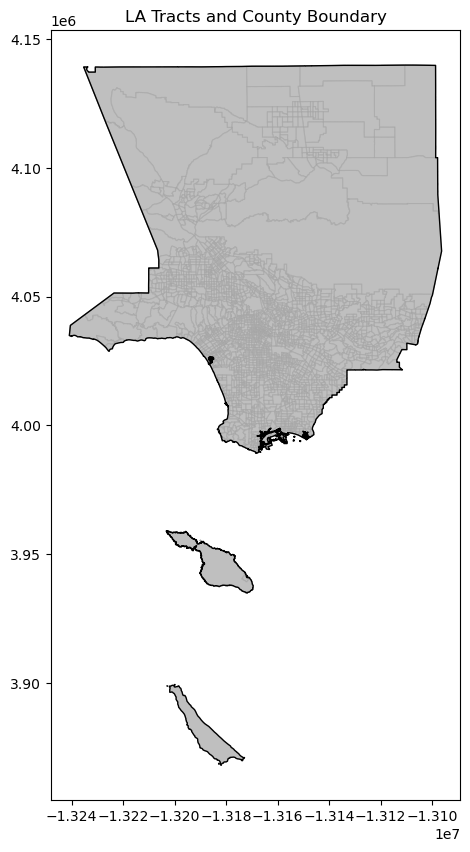

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt 

# Plot la_tracts and clip
fig, ax = plt.subplots(figsize=(10, 10))

# Plot LA tracts with opaque grey fill and dark grey skinny edge color
la_tracts.plot(ax=ax, color='grey', edgecolor='darkgrey', alpha=0.5, linewidth=0.75)

# Plot the clip boundary with black color
clip.boundary.plot(ax=ax, color='black', linewidth=1)

plt.title('LA Tracts and County Boundary')
plt.show()

In [26]:
heat_df.head()

,GEOID,HWAV_RISKS,heatrisk_class,geometry
0,6037599100,15.892118,0,MULTIPOLYGON (((-13173947.320773387 3940389.95...
1,6037620305,21.851068,0,POLYGON ((-13182420.365878586 4015434.46283120...
2,6037620201,16.687675,0,POLYGON ((-13182717.926413272 4016079.72588719...
3,6037620102,20.628597,0,POLYGON ((-13183097.643692017 4018544.68730978...
4,6037620101,24.027256,1,POLYGON ((-13183392.533542898 4019531.97673561...


In [27]:
tree_df.head()

,GEOID,City,Tree Canopy Existing Percentage,Tree Canopy Class
0,6037137504,Woodland Hills,30.562925,3
1,6037138000,Woodland Hills,34.899442,3
2,6037138000,Woodland Hills,33.835898,3
3,6037138000,Woodland Hills,28.695348,3
4,6037139200,Encino,22.877822,2


In [28]:
# Merge the dataframes on GEOID
merged_tracts = heat_df.merge(tree_df, left_on='GEOID', right_on='GEOID')

# Print the head of the merged dataframe
print(merged_tracts.head())

        GEOID  HWAV_RISKS  heatrisk_class  \
0  6037620102   20.628597               0   
1  6037620101   24.027256               1   
2  6037620101   24.027256               1   
3  6037278102   18.511868               0   
4  6037278102   18.511868               0   

                                            geometry           City  \
0  POLYGON ((-13183097.643692017 4018544.68730978...     El Segundo   
1  POLYGON ((-13183392.533542898 4019531.97673561...     El Segundo   
2  POLYGON ((-13183392.533542898 4019531.97673561...     El Segundo   
3  POLYGON ((-13186564.18543948 4023713.272160509...  Playa Del Rey   
4  POLYGON ((-13186564.18543948 4023713.272160509...  Playa Del Rey   

   Tree Canopy Existing Percentage  Tree Canopy Class  
0                        20.585198                  2  
1                        17.339476                  1  
2                        17.864072                  1  
3                         5.058247                  0  
4                     

In [29]:
merged_tracts.head()

,GEOID,HWAV_RISKS,heatrisk_class,geometry,City,Tree Canopy Existing Percentage,Tree Canopy Class
0,6037620102,20.628597,0,POLYGON ((-13183097.643692017 4018544.68730978...,El Segundo,20.585198,2
1,6037620101,24.027256,1,POLYGON ((-13183392.533542898 4019531.97673561...,El Segundo,17.339476,1
2,6037620101,24.027256,1,POLYGON ((-13183392.533542898 4019531.97673561...,El Segundo,17.864072,1
3,6037278102,18.511868,0,POLYGON ((-13186564.18543948 4023713.272160509...,Playa Del Rey,5.058247,0
4,6037278102,18.511868,0,POLYGON ((-13186564.18543948 4023713.272160509...,Playa Del Rey,21.774262,2


In [50]:
columns_to_keep_merge = ['GEOID', 
                   'heatrisk_class', 'Tree Canopy Class'                   ]
#add it to a new dataframe
merged_tracts_new=merged_tracts[columns_to_keep_merge]

In [51]:
merged_tracts_new['GEOID'] = merged_tracts_new['GEOID'].astype(str)

In [52]:
merged_tracts_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GEOID              2428 non-null   object
 1   heatrisk_class     2428 non-null   int64 
 2   Tree Canopy Class  2428 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 57.0+ KB


In [53]:
la_tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2534 entries, 399 to 1688
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   2534 non-null   object  
 1   COUNTYFP  2534 non-null   object  
 2   TRACTCE   2534 non-null   object  
 3   GEOID     2534 non-null   object  
 4   GEOIDFQ   2534 non-null   object  
 5   NAME      2534 non-null   object  
 6   NAMELSAD  2534 non-null   object  
 7   MTFCC     2534 non-null   object  
 8   FUNCSTAT  2534 non-null   object  
 9   ALAND     2534 non-null   int64   
 10  AWATER    2534 non-null   int64   
 11  INTPTLAT  2534 non-null   object  
 12  INTPTLON  2534 non-null   object  
 13  geometry  2534 non-null   geometry
dtypes: geometry(1), int64(2), object(11)
memory usage: 297.0+ KB


In [54]:
# Add leading zeros to GEOID column
merged_tracts_new['GEOID'] = merged_tracts_new['GEOID'].str.zfill(11)

# Print the head of the dataframe to verify the changes
merged_tracts_new.head()

,GEOID,heatrisk_class,Tree Canopy Class
0,06037620102,0,2
1,06037620101,1,1
2,06037620101,1,1
3,06037278102,0,0
4,06037278102,0,2


In [55]:
la_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
399,06,037,599100,06037599100,1400000US06037599100,5991,Census Tract 5991,G5020,S,337352192,1098469235,+32.9255700,-118.4972902,"MULTIPOLYGON (((-13173947.321 3940389.954, -13..."
6991,06,037,620305,06037620305,1400000US06037620305,6203.05,Census Tract 6203.05,G5020,S,1265579,1275093,+33.8923672,-118.4165728,"POLYGON ((-13182420.366 4015434.463, -13182375..."
4991,06,037,620201,06037620201,1400000US06037620201,6202.01,Census Tract 6202.01,G5020,S,229583,183201,+33.9033703,-118.4218562,"POLYGON ((-13182717.926 4016079.726, -13182681..."
7659,06,037,620102,06037620102,1400000US06037620102,6201.02,Census Tract 6201.02,G5020,S,871913,0,+33.9201935,-118.4180630,"POLYGON ((-13183097.644 4018544.687, -13182883..."
7664,06,037,620101,06037620101,1400000US06037620101,6201.01,Census Tract 6201.01,G5020,S,1335926,3064,+33.9274501,-118.4208606,"POLYGON ((-13183392.534 4019531.977, -13183244..."


In [65]:
# Export merged_tracts to a CSV file
merged_tracts_new.to_csv('merged_tracts_new1.csv', index=False)

In [66]:
merged_tracts_new1 = pd.read_csv('merged_tracts_new1.csv')
merged_tracts_new1.head()

,GEOID,heatrisk_class,Tree Canopy Class
0,6037620102,0,2
1,6037620101,1,1
2,6037620101,1,1
3,6037278102,0,0
4,6037278102,0,2


In [67]:
merged_tracts_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   GEOID              2428 non-null   int64
 1   heatrisk_class     2428 non-null   int64
 2   Tree Canopy Class  2428 non-null   int64
dtypes: int64(3)
memory usage: 57.0 KB


In [68]:
merged_tracts_new1['GEOID'] = merged_tracts_new1['GEOID'].astype(str)
merged_tracts_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GEOID              2428 non-null   object
 1   heatrisk_class     2428 non-null   int64 
 2   Tree Canopy Class  2428 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 57.0+ KB


In [69]:
merged_tracts_new1['GEOID'] = '0' + merged_tracts_new1['GEOID']
merged_tracts_new1.head()

,GEOID,heatrisk_class,Tree Canopy Class
0,06037620102,0,2
1,06037620101,1,1
2,06037620101,1,1
3,06037278102,0,0
4,06037278102,0,2


In [70]:
# Merge the dataframes on GEOID
index_merge = la_tracts.merge(merged_tracts_new1, left_on='GEOID', right_on='GEOID')

# Print the head of the merged dataframe
print(index_merge.head())

  STATEFP COUNTYFP TRACTCE        GEOID               GEOIDFQ     NAME  \
0      06      037  620102  06037620102  1400000US06037620102  6201.02   
1      06      037  620101  06037620101  1400000US06037620101  6201.01   
2      06      037  620101  06037620101  1400000US06037620101  6201.01   
3      06      037  278102  06037278102  1400000US06037278102  2781.02   
4      06      037  278102  06037278102  1400000US06037278102  2781.02   

               NAMELSAD  MTFCC FUNCSTAT    ALAND   AWATER     INTPTLAT  \
0  Census Tract 6201.02  G5020        S   871913        0  +33.9201935   
1  Census Tract 6201.01  G5020        S  1335926     3064  +33.9274501   
2  Census Tract 6201.01  G5020        S  1335926     3064  +33.9274501   
3  Census Tract 2781.02  G5020        S  1677533  1611460  +33.9583191   
4  Census Tract 2781.02  G5020        S  1677533  1611460  +33.9583191   

       INTPTLON                                           geometry  \
0  -118.4180630  POLYGON ((-13183097.644

In [71]:
# Create the 'tree_heat_index' column
index_merge['tree_heat_index'] = (
    index_merge['heatrisk_class'] + 
    index_merge['Tree Canopy Class']
)
index_merge.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,heatrisk_class,Tree Canopy Class,tree_heat_index
0,06,037,620102,06037620102,1400000US06037620102,6201.02,Census Tract 6201.02,G5020,S,871913,0,+33.9201935,-118.4180630,"POLYGON ((-13183097.644 4018544.687, -13182883...",0,2,2
1,06,037,620101,06037620101,1400000US06037620101,6201.01,Census Tract 6201.01,G5020,S,1335926,3064,+33.9274501,-118.4208606,"POLYGON ((-13183392.534 4019531.977, -13183244...",1,1,2
2,06,037,620101,06037620101,1400000US06037620101,6201.01,Census Tract 6201.01,G5020,S,1335926,3064,+33.9274501,-118.4208606,"POLYGON ((-13183392.534 4019531.977, -13183244...",1,1,2
3,06,037,278102,06037278102,1400000US06037278102,2781.02,Census Tract 2781.02,G5020,S,1677533,1611460,+33.9583191,-118.4523594,"POLYGON ((-13186564.185 4023713.272, -13186543...",0,0,0
4,06,037,278102,06037278102,1400000US06037278102,2781.02,Census Tract 2781.02,G5020,S,1677533,1611460,+33.9583191,-118.4523594,"POLYGON ((-13186564.185 4023713.272, -13186543...",0,2,2


In [72]:
import mapclassify

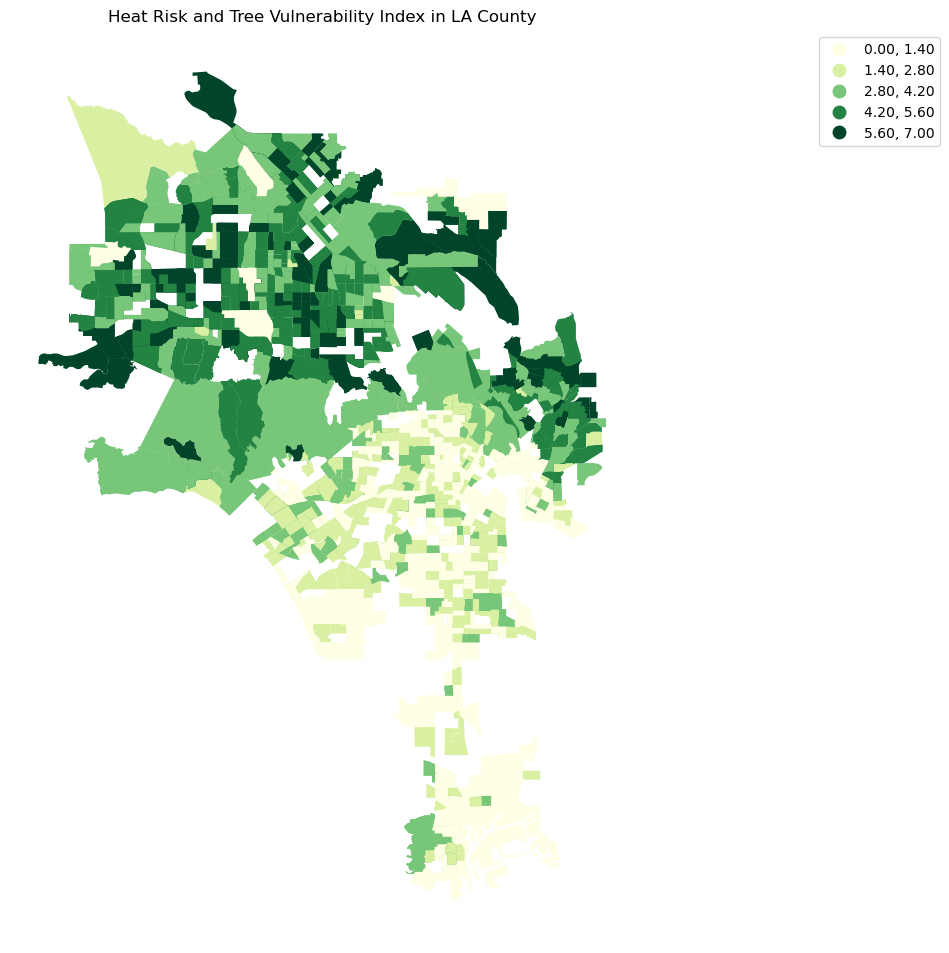

<Figure size 640x480 with 0 Axes>

In [73]:
# Plot the 'housing_transit_index' using equal intervals
fig, ax = plt.subplots(figsize=(10, 10))
index_merge.plot(column="tree_heat_index", scheme="Equal_Interval", k=5, cmap="YlGn", linewidth=0, legend=True, ax=ax)

# Use tight layout
plt.tight_layout()
plt.title('Heat Risk and Tree Vulnerability Index in LA County')
ax.axis('off')

# Place legend outside of plot
ax.get_legend().set_bbox_to_anchor((1.5, 1))
plt.show()

# Save the plot to a PNG file
plt.savefig('housing_transit_vulnerability_index.png')